In [8]:
from usefull import getGlobalModelResults
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
def getGlobalModelResults(modelName):
    dfList = []
    for dataset in os.listdir("results/"):
        #print(dataset)
        for file in os.listdir(f'results/{dataset}/'):
            if modelName in file and file.endswith("eval.csv"):
                #print(file)
                tmpDf = pd.read_csv(f'results/{dataset}/{file}')
                tmpDf = tmpDf[["modelName", "dataset", "accuracy_global", "recall_global", "f1_score_global"]]
                dfList.append(tmpDf)

    finalDf = pd.concat(dfList, ignore_index=True)
    #print(len(dfList))
    #print(len(finalDf))
    #print(finalDf)
    return finalDf

In [10]:
sparknlpGlobal = getGlobalModelResults("spark-nlp")

In [11]:
print(sparknlpGlobal)

   modelName       dataset  accuracy_global  recall_global  f1_score_global
0  spark-nlp        bc5cdr            75.95          85.03            80.23
1  spark-nlp        jnlpba            71.07          80.79            75.62
2  spark-nlp  ncbi-disease            85.15          88.13            86.62
3  spark-nlp      ontonote            82.22          87.44            84.68
4  spark-nlp    species800            92.34          92.32            92.33


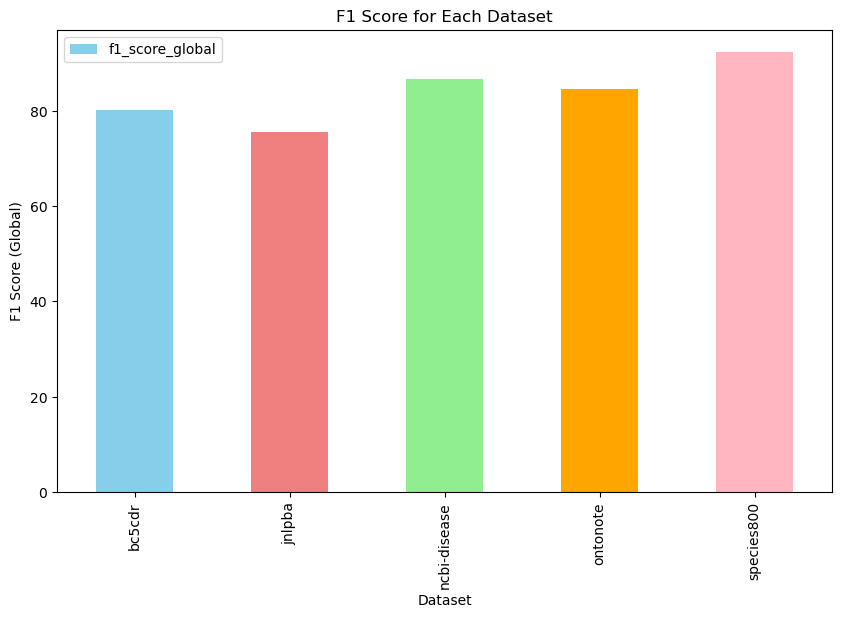

In [15]:
fig, ax = plt.subplots(figsize = (10, 6))

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink']

sparknlpGlobal.plot(kind = 'bar', x = 'dataset', y = 'f1_score_global', stacked = True, ax=ax, color = colors)


ax.set_xlabel('Dataset')
ax.set_ylabel('F1 Score (Global)')
ax.set_title('F1 Score for Each Dataset')
plt.show()

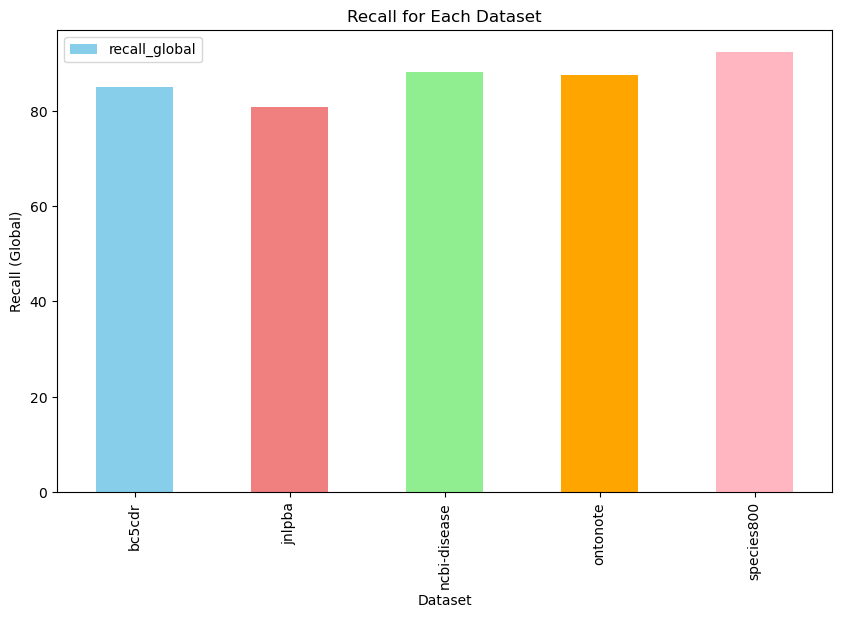

In [40]:
fig, ax = plt.subplots(figsize = (10, 6))

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink']

sparknlpGlobal.plot(kind = 'bar', x = 'dataset', y = 'recall_global', stacked = True, ax=ax, color = colors)


ax.set_xlabel('Dataset')
ax.set_ylabel('Recall (Global)')
ax.set_title('Recall for Each Dataset')
plt.show()

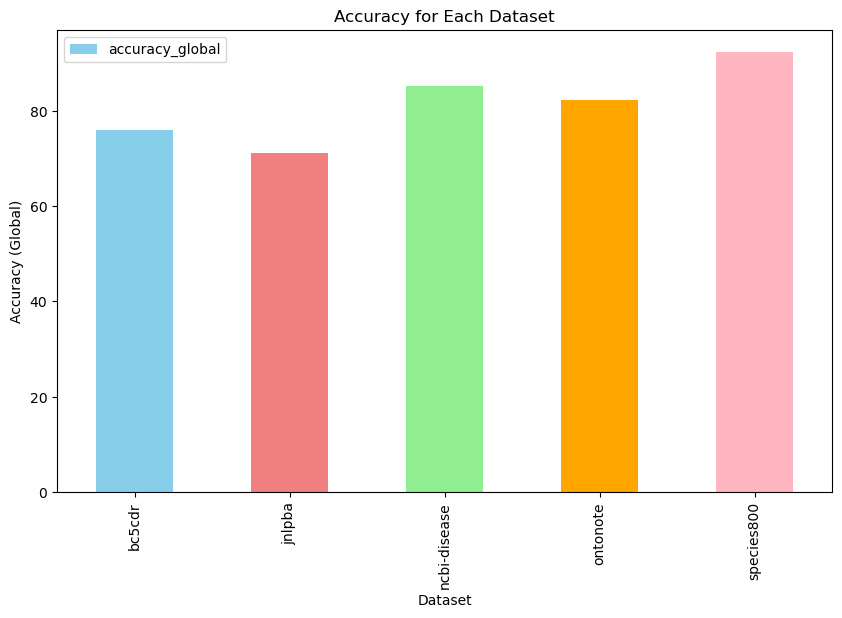

In [41]:
fig, ax = plt.subplots(figsize = (10, 6))

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink']

sparknlpGlobal.plot(kind = 'bar', x = 'dataset', y = 'accuracy_global', stacked = True, ax=ax, color = colors)


ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy (Global)')
ax.set_title('Accuracy for Each Dataset')
plt.show()

C:\Users\noman\AppData\Local\Temp\ipykernel_13920\414961926.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(sparknlpGlobal['dataset']))


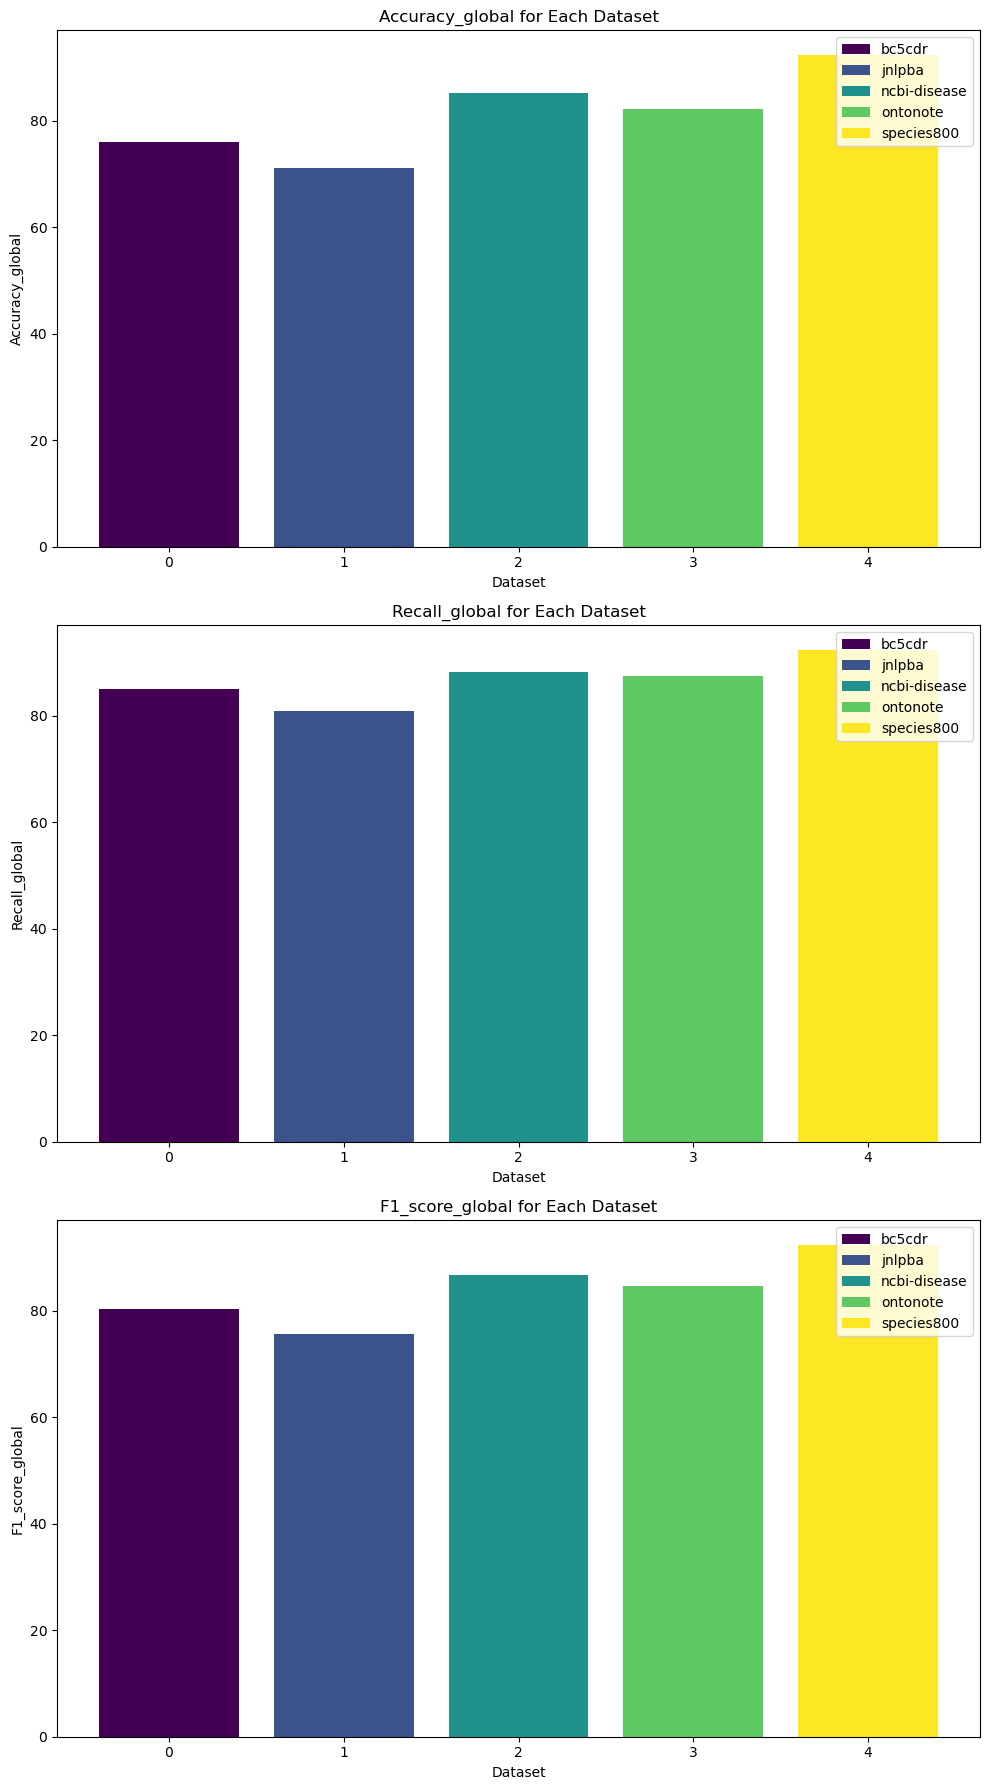

In [27]:
color_map = plt.cm.get_cmap('viridis', len(sparknlpGlobal['dataset']))

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# Plotting bar charts for accuracy, recall, and F1 score
metrics = ['accuracy_global', 'recall_global', 'f1_score_global']
for i, metric in enumerate(metrics):
    for j, (index, row) in enumerate(sparknlpGlobal.iterrows()):
        axes[i].bar(j, row[metric], color=color_map(j), label=row['dataset'])

    axes[i].set_xlabel('Dataset')
    axes[i].set_ylabel(f'{metric.capitalize()}')
    axes[i].set_title(f'{metric.capitalize()} for Each Dataset')
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\noman\AppData\Local\Temp\ipykernel_13920\2770102087.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(sparknlpGlobal['dataset']))


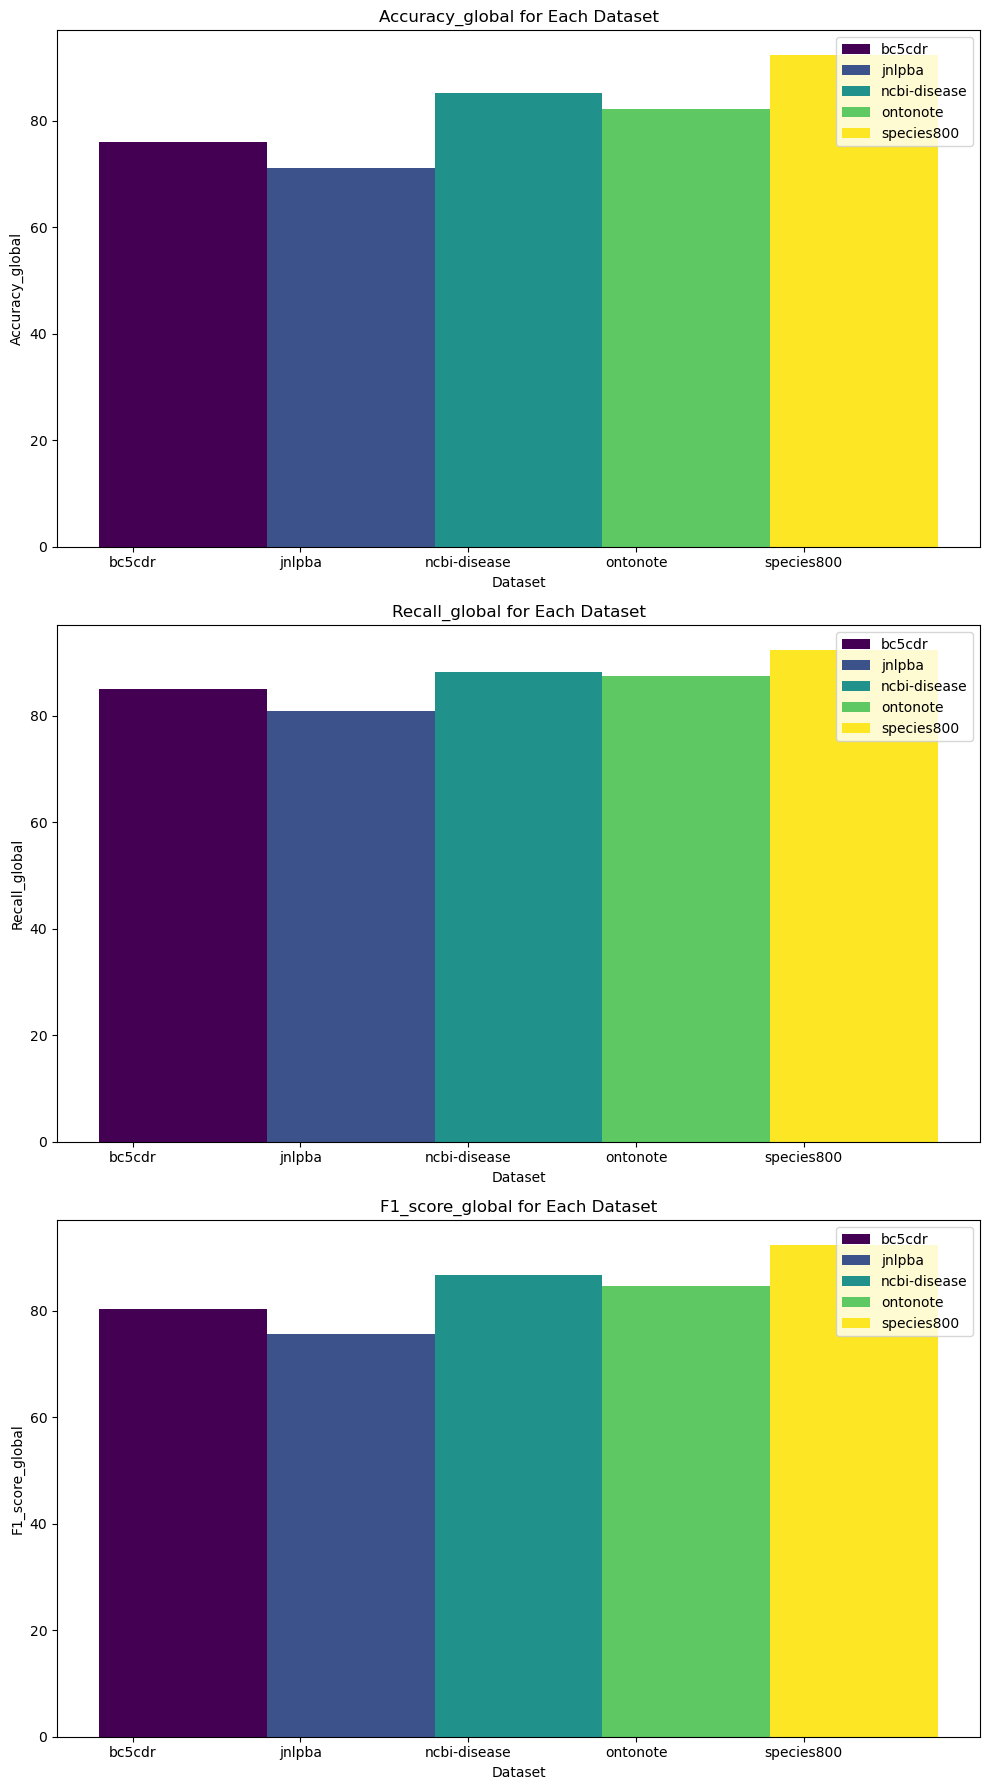

In [46]:
color_map = plt.cm.get_cmap('viridis', len(sparknlpGlobal['dataset']))

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# Plotting grouped bar charts for accuracy, recall, and F1 score
metrics = ['accuracy_global', 'recall_global', 'f1_score_global']
width = 0.2  # Width of the bars
for i, metric in enumerate(metrics):
    for j, (index, row) in enumerate(sparknlpGlobal.iterrows()):
        axes[i].bar(j + width * np.arange(len(sparknlpGlobal['dataset'])), row[metric], width=width, color=color_map(j), label=row['dataset'])

    axes[i].set_xlabel('Dataset')
    axes[i].set_ylabel(f'{metric.capitalize()}')
    axes[i].set_title(f'{metric.capitalize()} for Each Dataset')
    axes[i].set_xticks(np.arange(len(sparknlpGlobal['dataset'])) + width / 2)
    axes[i].set_xticklabels(sparknlpGlobal['dataset'])
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\noman\AppData\Local\Temp\ipykernel_13920\1962530015.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(sparknlpGlobal['dataset']))
C:\Users\noman\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\noman\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
C:\Users\noman\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\noman\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
C:\Users\noman\anac

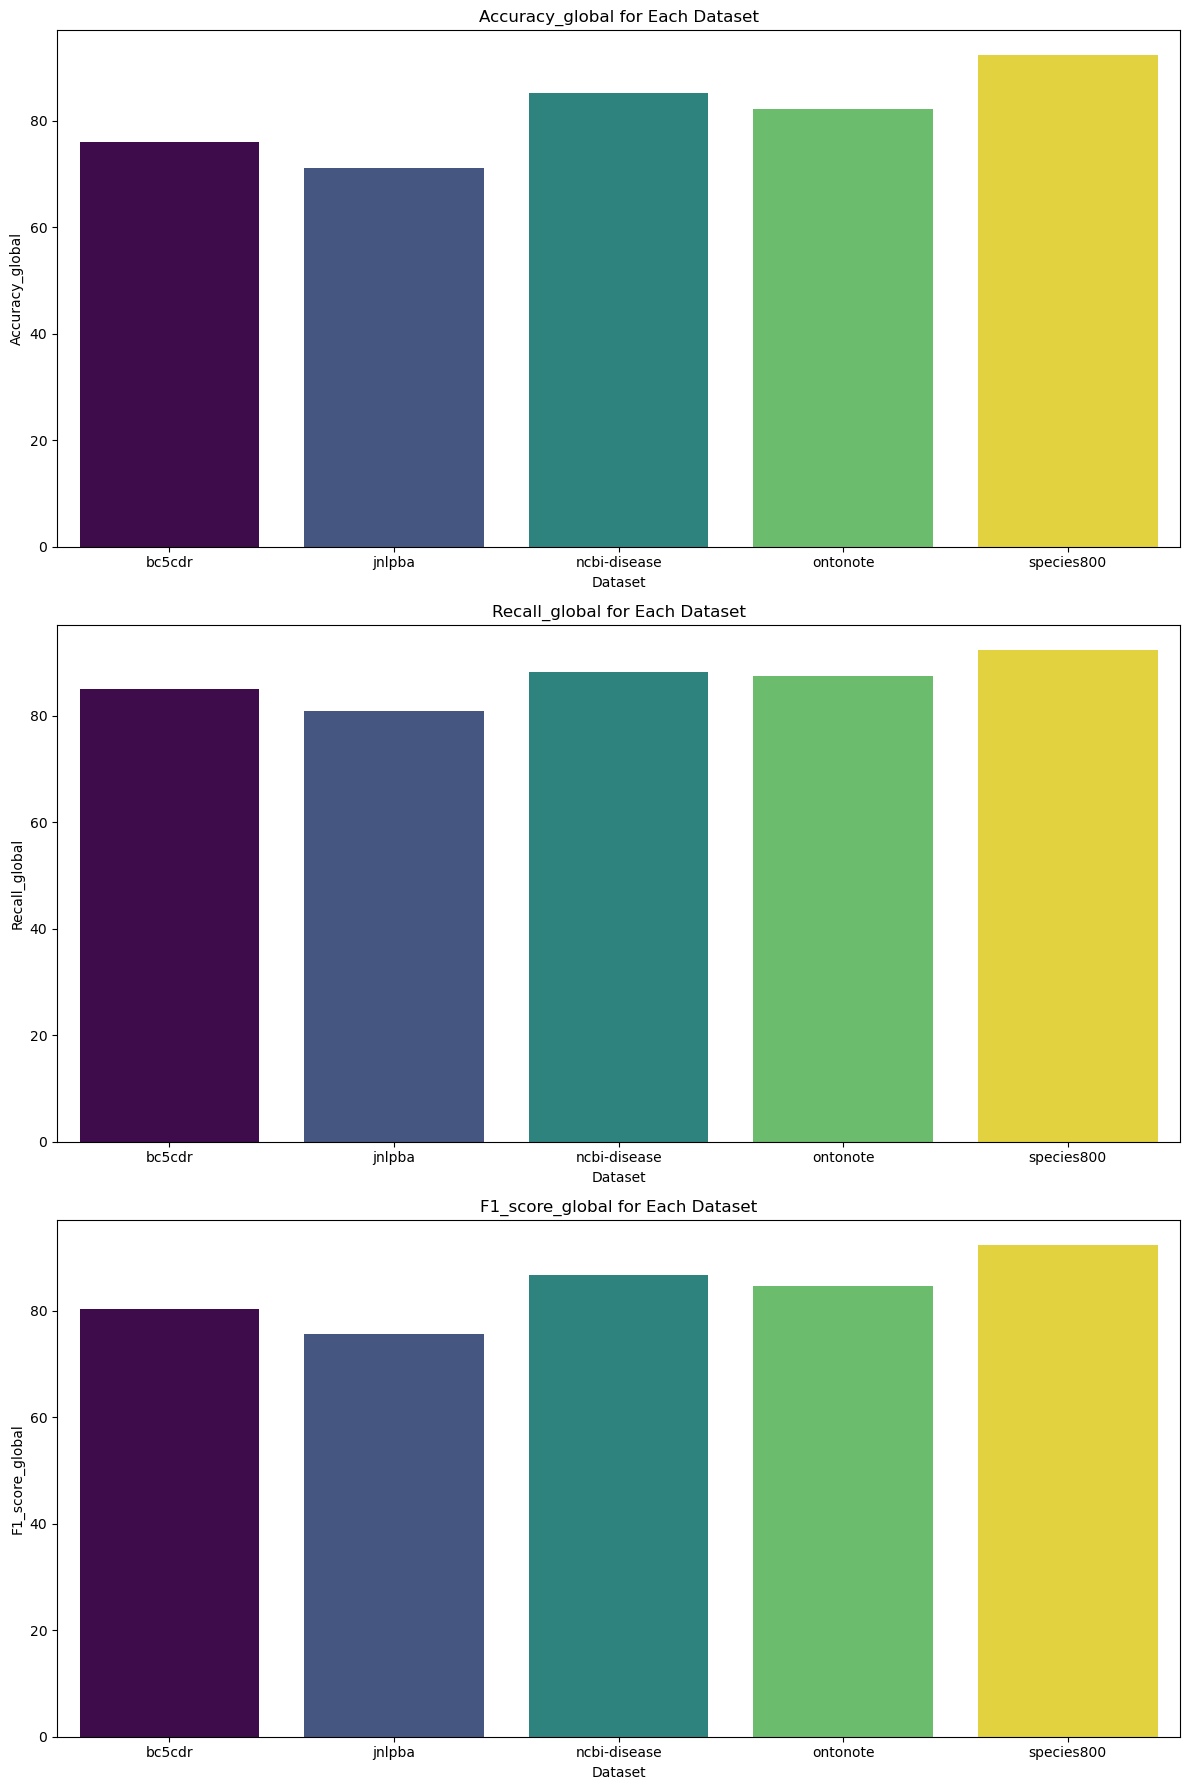

In [50]:
color_map = plt.cm.get_cmap('viridis', len(sparknlpGlobal['dataset']))

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Plotting grouped bar charts with error bars for accuracy, recall, and F1 score
metrics = ['accuracy_global', 'recall_global', 'f1_score_global']
for i, metric in enumerate(metrics):
    # Calculate standard deviation as error bars
    error_bars = sparknlpGlobal.groupby('dataset')[metric].std().reindex(sparknlpGlobal['dataset'])

    sns.barplot(x='dataset', y=metric, data=sparknlpGlobal, ax=axes[i], palette=color_map(np.arange(len(sparknlpGlobal['dataset']))), capsize=0.1, errwidth=1.5, yerr=error_bars)
    
    axes[i].set_xlabel('Dataset')
    axes[i].set_ylabel(f'{metric.capitalize()}')
    axes[i].set_title(f'{metric.capitalize()} for Each Dataset')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

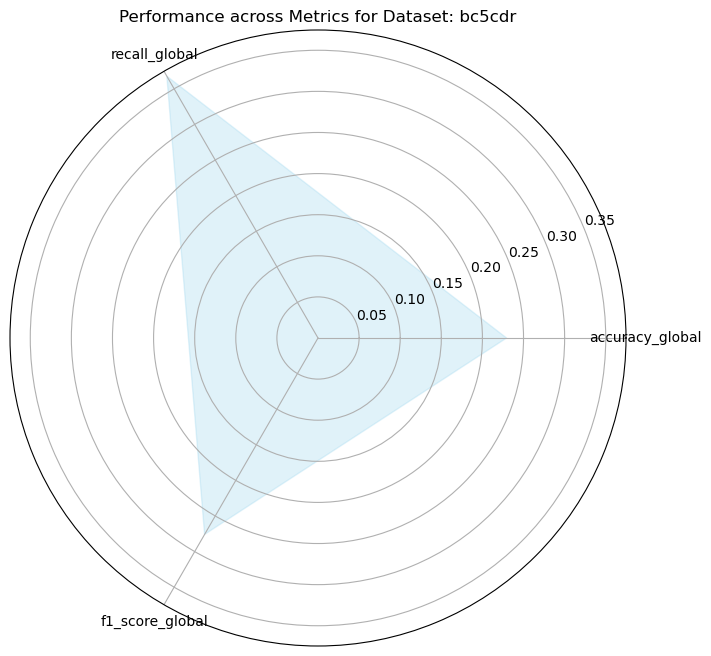

In [53]:
# Selecting only relevant columns for the radar chart
radar_df = sparknlpGlobal[['accuracy_global', 'recall_global', 'f1_score_global']]

# Normalize the data to be in the range [0, 1]
normalized_radar_df = (radar_df - radar_df.min()) / (radar_df.max() - radar_df.min())

# Number of variables
num_vars = len(radar_df.columns)

# Calculate angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the loop" and append the start to the end
values = normalized_radar_df.iloc[0].tolist()
values += values[:1]

angles += angles[:1]

# Plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='skyblue', alpha=0.25)

# Adding labels
ax.set_thetagrids(np.degrees(angles[:-1]), radar_df.columns)
ax.set_title('Performance across Metrics for Dataset: ' + sparknlpGlobal['dataset'][0])

# Display the plot
plt.show()

ValueError: operands could not be broadcast together with shapes (3,) (5,) 

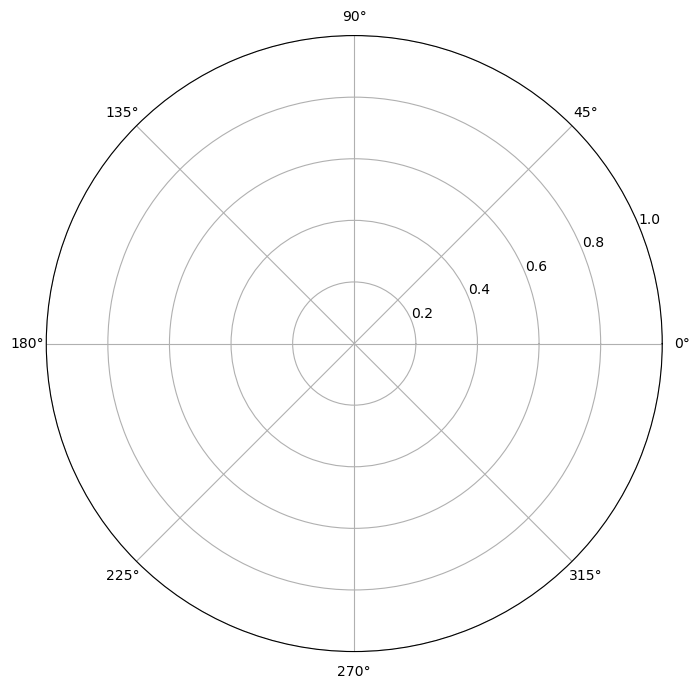

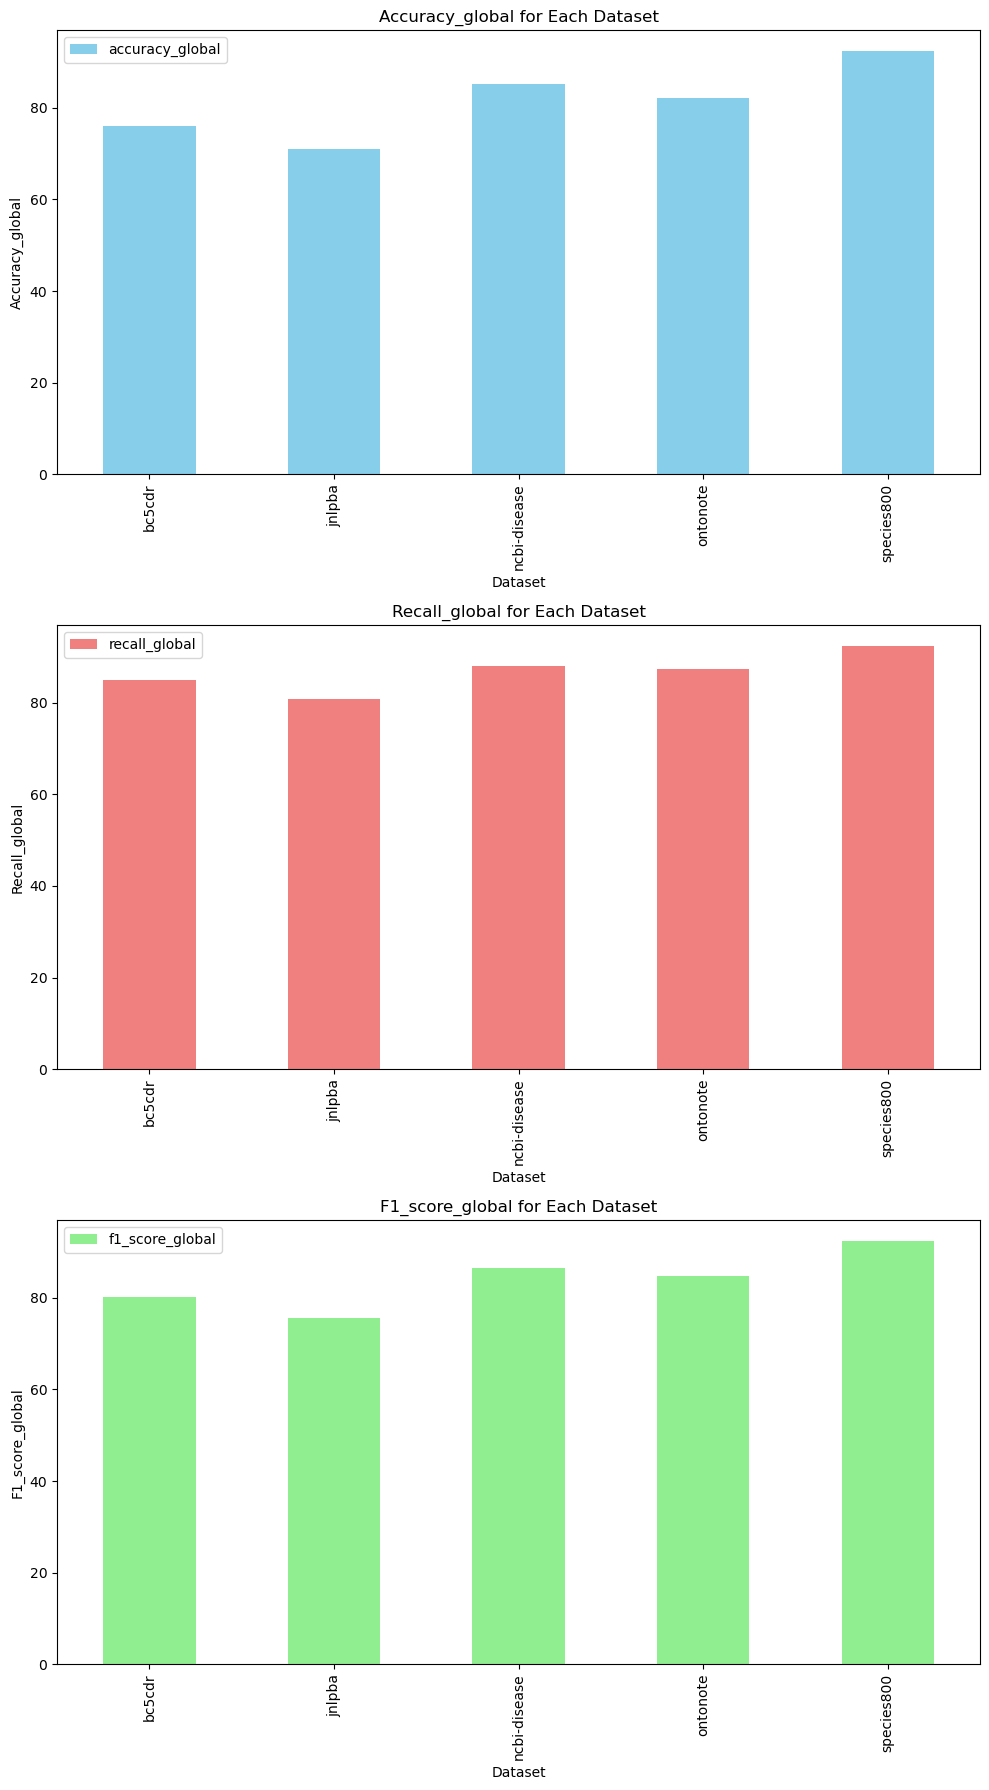

In [12]:
ig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))
 
# Different colors for each bar within a subplot
bar_colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightpink']
 
# Plotting bar charts for accuracy, recall, and F1 score
metrics = ['accuracy_global', 'recall_global', 'f1_score_global']
 
for i, metric in enumerate(metrics):
    # Use a different color for each bar in the subplot
    sparknlpGlobal.plot(kind='bar', x='dataset', y=[metric], stacked=True, ax=axes[i], color=[bar_colors[i]])
    axes[i].set_xlabel('Dataset')
    axes[i].set_ylabel(f'{metric.capitalize()}')
    axes[i].set_title(f'{metric.capitalize()} for Each Dataset')
 

plt.tight_layout()
 
# Display the plot
plt.show()

C:\Users\noman\AppData\Local\Temp\ipykernel_21888\2078157455.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(sparknlpGlobal['dataset']))
C:\Users\noman\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\noman\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
C:\Users\noman\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
C:\Users\noman\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
C:\Users\noman\anac

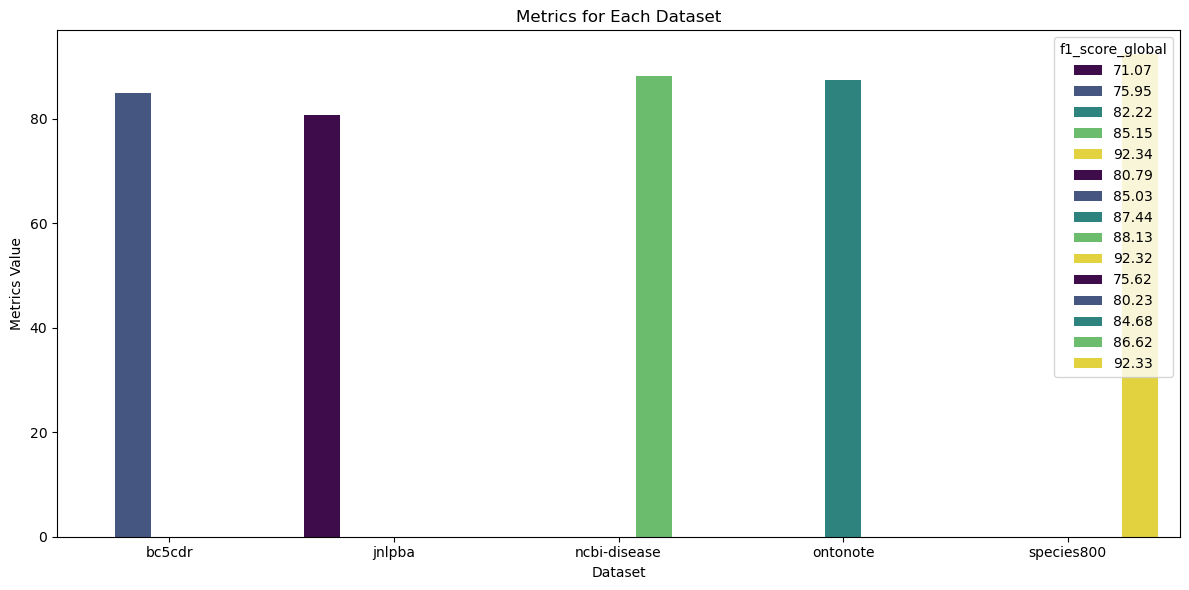

In [13]:
# Set up a color map for each dataset
color_map = plt.cm.get_cmap('viridis', len(sparknlpGlobal['dataset']))

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# Concatenate bar plots for accuracy, recall, and F1 score
metrics = ['accuracy_global', 'recall_global', 'f1_score_global']
for i, metric in enumerate(metrics):
    # Calculate standard deviation as error bars
    error_bars = sparknlpGlobal.groupby('dataset')[metric].std().reindex(sparknlpGlobal['dataset'])

    sns.barplot(x='dataset', y=metric, data=sparknlpGlobal, ax=axes, palette=color_map(np.arange(len(sparknlpGlobal['dataset']))), capsize=0.1, errwidth=1.5, yerr=error_bars, hue=metric)

axes.set_xlabel('Dataset')
axes.set_ylabel('Metrics Value')
axes.set_title('Metrics for Each Dataset')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\noman\AppData\Local\Temp\ipykernel_21888\1088492138.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(sparknlpGlobal['dataset']))


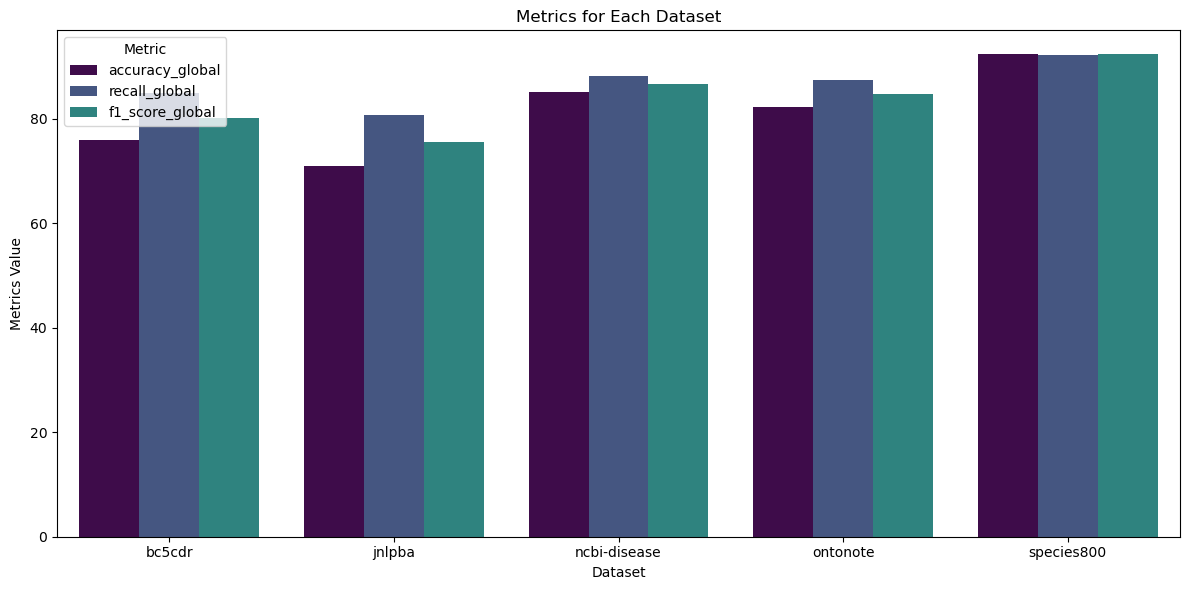

In [16]:
# Melt the dataframe to combine the metrics into one column
melted_df = pd.melt(sparknlpGlobal, id_vars=['dataset'], value_vars=['accuracy_global', 'recall_global', 'f1_score_global'], var_name='Metric')

# Set up a color map for each dataset
color_map = plt.cm.get_cmap('viridis', len(sparknlpGlobal['dataset']))

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# Concatenate bar plots for accuracy, recall, and F1 score
sns.barplot(x='dataset', y='value', data=melted_df, ax=axes, palette=color_map(np.arange(len(sparknlpGlobal['dataset']))), hue='Metric', capsize=0.1, errwidth=1.5)

axes.set_xlabel('Dataset')
axes.set_ylabel('Metrics Value')
axes.set_title('Metrics for Each Dataset')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()